In [1]:
import json
import pymongo
import tweepy
import webbrowser

with open('api_key.txt', 'r') as f:
    consumer_key =  f.read()
f.closed

with open('api_secret.txt', 'r') as f:
    consumer_secret = f.read()
f.closed

with open('access_token.txt', 'r') as f:
    access_key = f.read()
f.closed

with open('access_token_secret.txt', 'r') as f:
     access_secret = f.read()
f.closed

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

USER_NAME = "subbar77"
user = api.get_user(id=USER_NAME)
print (user)

User(_api=<tweepy.api.API object at 0x0000019510F1A048>, _json={'id': 875478667, 'id_str': '875478667', 'name': 'k venkata subbareddy', 'screen_name': 'subbar77', 'location': 'Pune, India', 'profile_location': {'id': '5c0761bdffa0cb64', 'url': 'https://api.twitter.com/1.1/geo/id/5c0761bdffa0cb64.json', 'place_type': 'unknown', 'name': 'Pune, India', 'full_name': 'Pune, India', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 23, 'friends_count': 95, 'listed_count': 0, 'created_at': 'Fri Oct 12 11:53:02 +0000 2012', 'favourites_count': 5, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 7, 'lang': None, 'status': {'created_at': 'Tue Oct 01 21:14:35 +0000 2019', 'id': 1179142587833372672, 'id_str': '1179142587833372672', 'text': 'What a performance even at the age of 64 yrs....

In [2]:
user.screen_name

'subbar77'

In [3]:
timeline = api.user_timeline(id='POTUS',count=5)
#Retrieve a Status object...

for status in timeline:
    print (status.text+ "\n")

Tune in as I deliver remarks on the August jobs report. https://t.co/gdgovVvNDs

Over the last week, I’ve been in constant communication with FEMA as we respond to Ida. We’re working around the cl… https://t.co/0qIWab5Hyt

To all those still in harm’s way or struggling to deal with the aftermath of these storms and fires — God bless you… https://t.co/2e07FA3cdq

Let’s keep this progress going and defeat this virus.

Get vaccinated: https://t.co/jlrmakxHWm https://t.co/eTmoQRPXRY

The past few days of Hurricane Ida, wildfires in the West, and unprecedented flash floods in New York and New Jerse… https://t.co/Ingoz8q1M2



In [4]:
#We can access the full JSON
user._json

{'id': 875478667,
 'id_str': '875478667',
 'name': 'k venkata subbareddy',
 'screen_name': 'subbar77',
 'location': 'Pune, India',
 'profile_location': {'id': '5c0761bdffa0cb64',
  'url': 'https://api.twitter.com/1.1/geo/id/5c0761bdffa0cb64.json',
  'place_type': 'unknown',
  'name': 'Pune, India',
  'full_name': 'Pune, India',
  'country_code': '',
  'country': '',
  'contained_within': [],
  'bounding_box': None,
  'attributes': {}},
 'description': '',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 23,
 'friends_count': 95,
 'listed_count': 0,
 'created_at': 'Fri Oct 12 11:53:02 +0000 2012',
 'favourites_count': 5,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 7,
 'lang': None,
 'status': {'created_at': 'Tue Oct 01 21:14:35 +0000 2019',
  'id': 1179142587833372672,
  'id_str': '1179142587833372672',
  'text': 'What a performance even at the age of 64 yrs.... Waiting eagerly😍 

In [5]:
juser = user._json
print (juser['created_at'])
img_url = juser['profile_image_url']
print (img_url)

Fri Oct 12 11:53:02 +0000 2012
http://pbs.twimg.com/profile_images/560850286932029440/1nyVkKoE_normal.jpeg


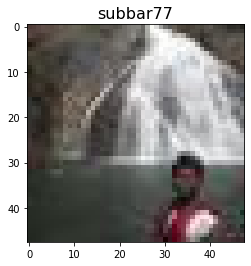

In [6]:
import urllib
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt

im = Image.open(urllib.request.urlopen(img_url))
plt.title(juser['screen_name'],size=16)
plt.imshow(im)

In [7]:
#Inputs for the request
bearer_token = auth()
headers = create_headers(bearer_token)
keyword = "xbox lang:en"
start_time = "2021-03-01T00:00:00.000Z"
end_time = "2021-03-31T00:00:00.000Z"
max_results = 15

TypeError: 'OAuthHandler' object is not callable

In [10]:
from tweepy import Stream,StreamListener

class listener(StreamListener): #listener is something that listens and waits for some commands i.e. some input from devices, here it is waiting for a tweet
    
    def __init__(self): #when listener is initialised for the first time, we use __init__
        super(StreamListener, self).__init__()
        self.num_tweets = 0
    def on_data(self, data):
        #Beauty print data
        if self.num_tweets < 5:
            parsed = json.loads(data)
            print (json.dumps(parsed, indent=4, sort_keys=True))
            self.num_tweets += 1
            return True
        else:
            return False

    def on_error(self, status):
        print ("Error "+str(status))
        
        
        


In [15]:
twitterStream = Stream(auth, listener()) 
twitterStream.filter(track="Bahubali") #coordinates can be obtained from bounding box
print ("done")

{
    "contributors": null,
    "coordinates": null,
    "created_at": "Fri Sep 03 17:24:57 +0000 2021",
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [
            {
                "display_url": "twitter.com/i/web/status/1\u2026",
                "expanded_url": "https://twitter.com/i/web/status/1433843468384849922",
                "indices": [
                    117,
                    140
                ],
                "url": "https://t.co/T7JP5BlcPP"
            }
        ],
        "user_mentions": [
            {
                "id": 50325797,
                "id_str": "50325797",
                "indices": [
                    0,
                    10
                ],
                "name": "Chuck Todd",
                "screen_name": "chucktodd"
            }
        ]
    },
    "extended_tweet": {
        "display_text_range": [
            0,
            276
        ],
        "entities": {
            "hashtags": [],
       